<p class="pull-left">
ANLT 212 - Analytics Computing
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Dana Nehoran 2017
</ul>
</div>

<div style="background-color: #A378AF; border:1px solid #000; margin-left: 2px; margin-right: 2px; 
padding-bottom: 2px; padding-left: 2px; padding-right: 1px; padding-top: 10px;">
<center><b><font size="6">Group Project 2 - Python Project</font></b></center>
</div>

Student Names:

<center><font size = 10>Tyler Norlund & Edwin Ramirez</font></center>

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 1:</b> Project Definition</blockquote> 

Select a dataset from the UCI Machine Learning Repository 
http://archive.ics.uci.edu/ml/datasets.html
Your dataset should be different from the one utilized on project 1. 

Describe your stakeholder. Who is the potential sponsor of your project? For example: a real estate investor, the police department, a city mayor, etc. Explain what is the objective of this project and its justification. What are the findings so far, and what is your objective.

Note: <br>
If you want to select a dataset from a different public repository, you can.


<b><font color="blue" size = 4>a)</font> Data Selection</b>: Explain why this data was selected. What are the overall characteristics of the data.

<span style="background-color: #FFFF00">Your answer here</span>

In this project, we use the [Spotify API](https://developer.spotify.com/). This was done in python using the [Spotipy](https://spotipy.readthedocs.io/en/latest/#) python library. Using python, we obtained Spotify's top playlists and stored each playlist in a CSV format.

In [1]:
import matplotlib.pyplot as plt
import os
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from pandas import DataFrame
from os import listdir
from os.path import isfile, join
from scipy.cluster.hierarchy import fcluster
from mpl_toolkits.mplot3d import Axes3D

song_data_df = pd.read_csv('song_data.csv', index_col = 0)
song_info_df = pd.read_csv('song_info.csv', index_col = 0)

<b><font color="blue" size = 4>b)</font> Stakeholder</b>: Describe your stakeholder. Who is the potential sponsor of your project? For example: a real estate investor, the police department, a city mayor, etc. 

<span style="background-color: #FFFF00">Your answer here</span>

In this project, Spotify and music producers would be the stakeholders.

<b><font color="blue" size = 4>c)</font> Objective</b>: Project objective, justification, expected outcome. How your results may impact your stake holders. Which decisions or changes will the stakeholder be able to make based on this project

<span style="background-color: #FFFF00">Your answer here</span>

In this project we will classify songs based on the genres the songs belong to. This would help spotify better understand the types of songs people listen to and give Spotify a way to recomend songs. 

<b><font color="blue" size = 4>d)</font> Background Research</b>: List here all other studies related to clustering published with the same dataset, and how your proposed study is different from them.

If no other clustering studies were conducted with the same dataset, you should specify: "No other studies available"

<span style="background-color: #FFFF00">Your answer here</span>

Since we are using the Spotify API to get our own dataset, no other studies are available with this specific dataset. 

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 2:</b> Exploratory Data Analysis</blockquote> 

Create some exploratory analysis on your data using core Python functions and visualizations. Cluster the information into different groups to explore the possibilities for your proposed project. Summarize your data and conduct some statistics. Explain your findings in English.

<b><font color="blue" size = 4>a)</font> Data Summary</b>: Show summary information of the different variables. Select the columns you are interested in. Explain each column, its range and purpose

<span style="background-color: #FFFF00">Your answer here</span>

For our project we decided to utilize Spotify's API to collect a number of playlists that contained random songs, each defined with their own numerical attributes that we could use for our clustering analysis. Thus, we decided to pull data from Spotify's top playlists from varying genres. To collect this data we created a python script `spotify2csv.py` that creates a folder and stores each playlist into separate CSV files. Our python script for playlist collection can be viewed [here](https://github.com/edalrami/spotify_clustering/blob/master/spotify2csv.py).  

Once we collected our playlist data, we decided to combine all of them into one main dataframe `songs_df`, and created an additional column that contained the name of the playlist that each song originated from. Below is an image of the code we used to concatenate all our .csv data into one main dataframe.

**IMAGE 1: Concatenate All Playlist Data Into One CSV File**

**______________________________________________**

<img src="DataFrameCreation.PNG">

The image below illustrates a summary of the features from the data we collected along with a small sample of the data 

**IMAGE 2: Sample of Initial Data Read**

<img src="oldOutputs.PNG">

We are primarily interested in the numerical data that Spotify stores for each song. Therefore, we are not interested in the following attributes in regards to our calculations: date added to playlist, artist name, album names, or album release date. These attributes do not offer any information on the musicality of the songs that can be used in our clustering analysis. However, we did separate the combined data into two separate CSV files that are the main files that we are using for this project, `song_data.csv` and `song_info.csv`. `song_data.csv` contains all the numerical features that will be used in our clustering analysis, while `song_info.csv` contains features that include the artist name of each song, album name, and playlist it originated from. To see in greater detail how we separated our data to create these two CSV files, the code can be viewed in [here](https://github.com/edalrami/spotify_clustering/blob/master/DataCollection.ipynb)

After cleaning our data and separating them into two separate csv files, our resulting features that will be used in our analysis are listed below:

In [3]:
print("Song Data Columns names: \n")
print(song_data_df.columns.values)
print("\nSong Info Columns names: \n")
print(song_info_df.columns.values)

Song Data Columns names: 

['song_popularity' 'song_duration_ms' 'acousticness' 'danceability'
 'energy' 'instrumentalness' 'key' 'liveness' 'loudness' 'audio_mode'
 'speechiness' 'tempo' 'time_signature' 'audio_valence']

Song Info Columns names: 

['artist_name' 'album_names' 'playlist']


In [4]:
print(song_data_df.head())

                            song_popularity  song_duration_ms  acousticness  \
song_name                                                                     
Boulevard of Broken Dreams               73            262333      0.005520   
In The End                               66            216933      0.010300   
Seven Nation Army                        76            231733      0.008170   
By The Way                               74            216933      0.026400   
How You Remind Me                        56            223826      0.000954   

                            danceability  energy  instrumentalness  key  \
song_name                                                                 
Boulevard of Broken Dreams         0.496   0.682          0.000029    8   
In The End                         0.542   0.853          0.000000    3   
Seven Nation Army                  0.737   0.463          0.447000    0   
By The Way                         0.451   0.970          0.003550    0

**Song Duration (ms)**

Contains data on the length of time the song is in milliseconds

**Acousticness**

A measurement from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents highest confidence the track is acoustic.

**Danceability**

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of type float is returned between 0.0 and 1.0, where 0.0 is least danceable and 1.0 is most danceable.

**Energy**

Energy is a measure of type float that is between 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Energetic tracks can be described as fast, loud, and noisy. For example, death metal has high energy, while a slow jazz would register low on the scale.

**Instrumentalness**

Predicts whether a track contains no vocals by returning a value of type float that is between 0.0 and 1.0. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness**

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


**Loudness**

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db

**Audio Mode**

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**Speechiness**

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
**Tempo**

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Time Signature**

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**Key Signature**

Key signature is represented on a scale, where integers are mapped to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 

**Audio Valence**

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


<b><font color="blue" size = 4>b)</font> Data Cleaning</b>: Clean the data, removing rows and columns that have no useful information or no information at all

<span style="background-color: #FFFF00">Your answer here</span>

Our two separate dataframes are `song_info` and `songs_df`, where `songs_df` contains numerical data for each attriubte, and `song_info` contains the artist name, album name, and playlist that each song originated from. However, before we created these two separate CSV files, these were all the features listed before we cleaned the data and created `song_data.csv` and `song_info.csv`.   
<img src="DataBeforeCleaning.PNG">

As it can be seen the features that we removed entirely included: unnamed, data added to playlist, and album release date. The attributes that we used for `song_info.csv` included song name, artist name, album name, and playlist. `song_data.csv` contained the remaining features. Again, to see the lengthy process on how we collected our data, and how we separated and cleaned it, our code can be viewed in the following links:

Data Collection: [spotify2csv.py](https://github.com/edalrami/spotify_clustering/blob/master/spotify2csv.py)

Data Cleaning: [Data Cleaning](https://github.com/edalrami/spotify_clustering/blob/master/DataCollection.ipynb)

<b><font color="blue" size = 4>c)</font> Adaptation</b>: Create at least two additional columns that are necessary for your study. They can be calculated columns or aggregated columns.

In [5]:
song_data_df["tempo_vs_dance"] = song_data_df["tempo"]/song_data_df["danceability"]
song_data_df["dance_vs_speech"] = song_data_df["danceability"]/song_data_df["speechiness"]

print(song_data_df.head())

                            song_popularity  song_duration_ms  acousticness  \
song_name                                                                     
Boulevard of Broken Dreams               73            262333      0.005520   
In The End                               66            216933      0.010300   
Seven Nation Army                        76            231733      0.008170   
By The Way                               74            216933      0.026400   
How You Remind Me                        56            223826      0.000954   

                            danceability  energy  instrumentalness  key  \
song_name                                                                 
Boulevard of Broken Dreams         0.496   0.682          0.000029    8   
In The End                         0.542   0.853          0.000000    3   
Seven Nation Army                  0.737   0.463          0.447000    0   
By The Way                         0.451   0.970          0.003550    0

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 3:</b> Visualization with MatPlotLib</blockquote> 

<b><font color="blue" size = 4>a)</font> Descriptive Analytics</b>: Create at least 5 different (unique) visualizations that show different aspects of your data related to the research object of your project

Our images are included in part B to provide clearer explanation.

<b><font color="blue" size = 4>b)</font> Outcome</b>: Explain in words the outcome of your descriptive analysis


<span style="background-color: #FFFF00">Your answer here</span>

**2D Histogram - Energy vs. Audio Valence**

Text(0.5, 0, 'Audio Valence')

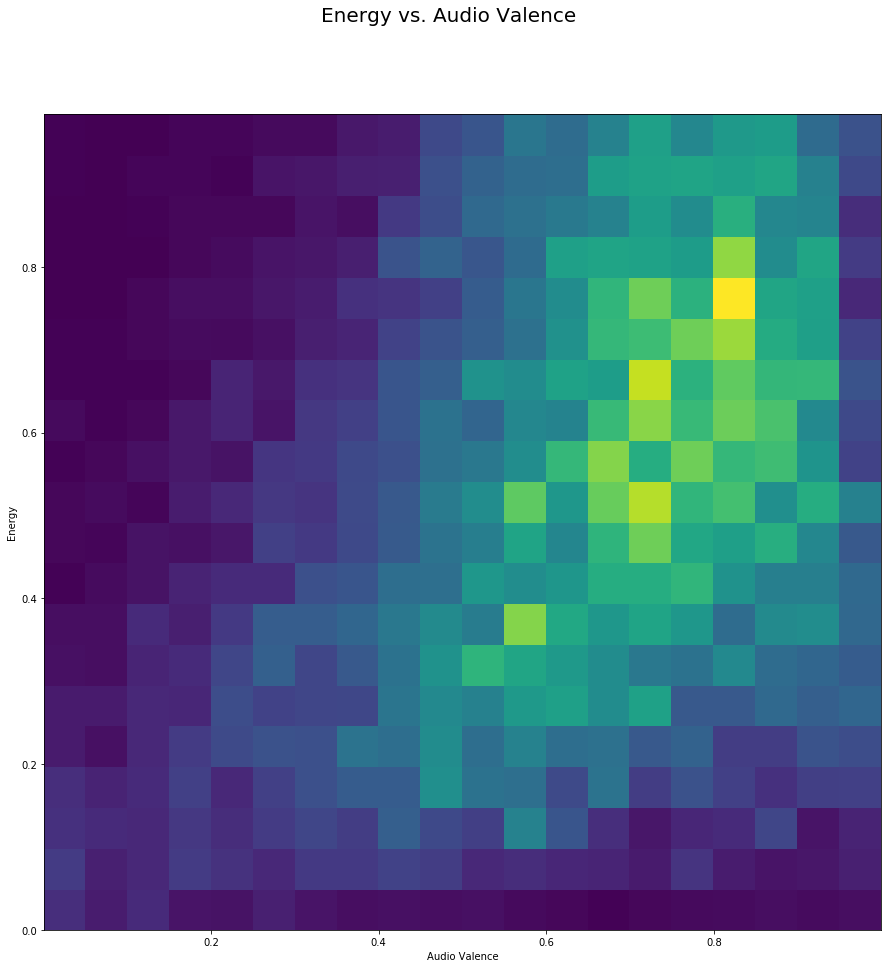

In [7]:
fig, ax = plt.subplots(figsize = (15,15))
hist = ax.hist2d(song_data_df['energy'], song_data_df['audio_valence'], bins=20)
plt.suptitle('Energy vs. Audio Valence', fontsize = 20)
plt.ylabel("Energy")
plt.xlabel("Audio Valence")

This histogram is primarily interesting because it illustrates the intensity of energy plotted against the intensity of audio valence. **Energy** is defined as perceptual measure of intensity, such as loudness, noise, and speed. However, this is **NOT** the same as  **tempo**, which refers to beats per minute(BPM). If a song has a high tempo, the perceptual intensity of the song is not necessarily high energy. A song can have a low tempo, yet still have seemingly high energy. A good example of this would be the song ["Snow"](https://youtu.be/yuFI5KSPAt4) by the Red Hot Chili Peppers, which has a BPM of 104, which is considered a "walking pace" tempo, yet still conveys a fast energetic movement with the guitar melody. Now if we consider the second variable in this histogram, **audio valence**, which represents perceptual measure of positivity and cheerfulness, we can see how this illustration can portray possible areas of different genres. For example, low audio valence and high energy could represent genres, such as metal or rap in the upper left hand corner, and the upper right corner could represent songs that are more high energy and audio valence, such as salsa, merengue and other music people dance to. This could be further analyzed if we decide to plot **danceability** versus **audio valence**, which can be seen below.

**2D Histogram - Danceability vs. Audio Valence**

Text(0.5, 0, 'Audio Valence')

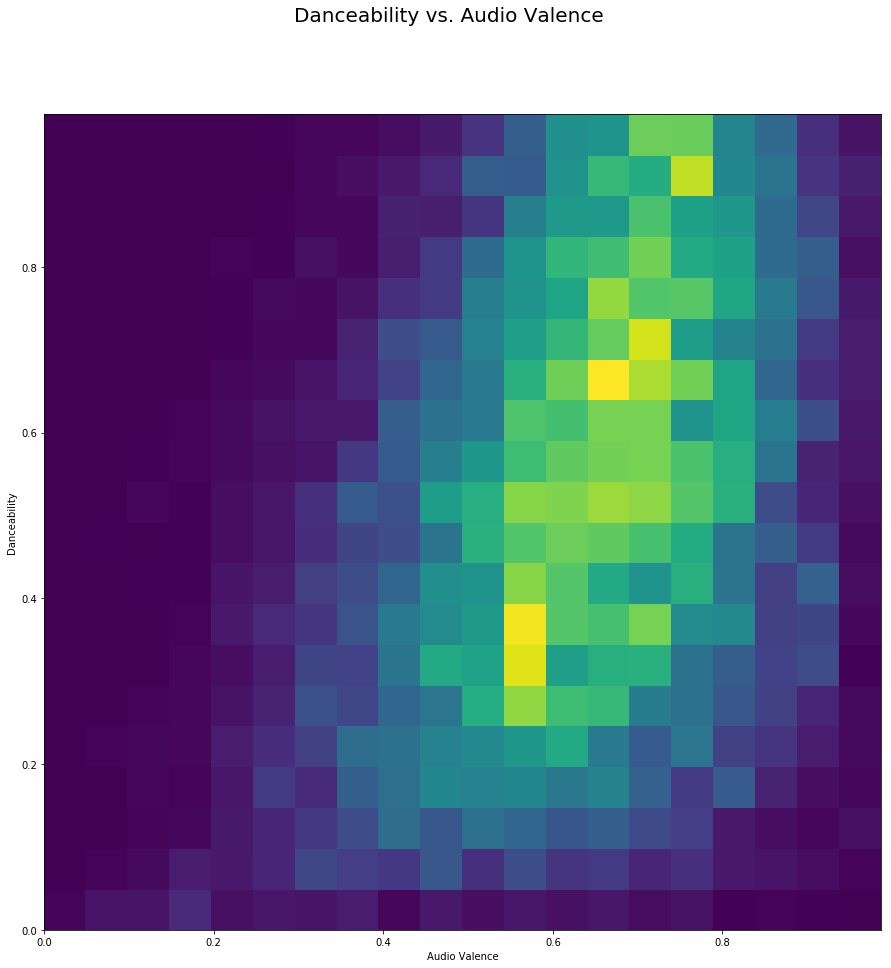

In [8]:
fig, ax = plt.subplots(figsize = (15,15))
hist = ax.hist2d(song_data_df['danceability'], song_data_df['audio_valence'], bins=20)
plt.suptitle('Danceability vs. Audio Valence', fontsize = 20)
plt.ylabel("Danceability")
plt.xlabel("Audio Valence")

**Scatter Plot - Danceability vs. Speechiness**

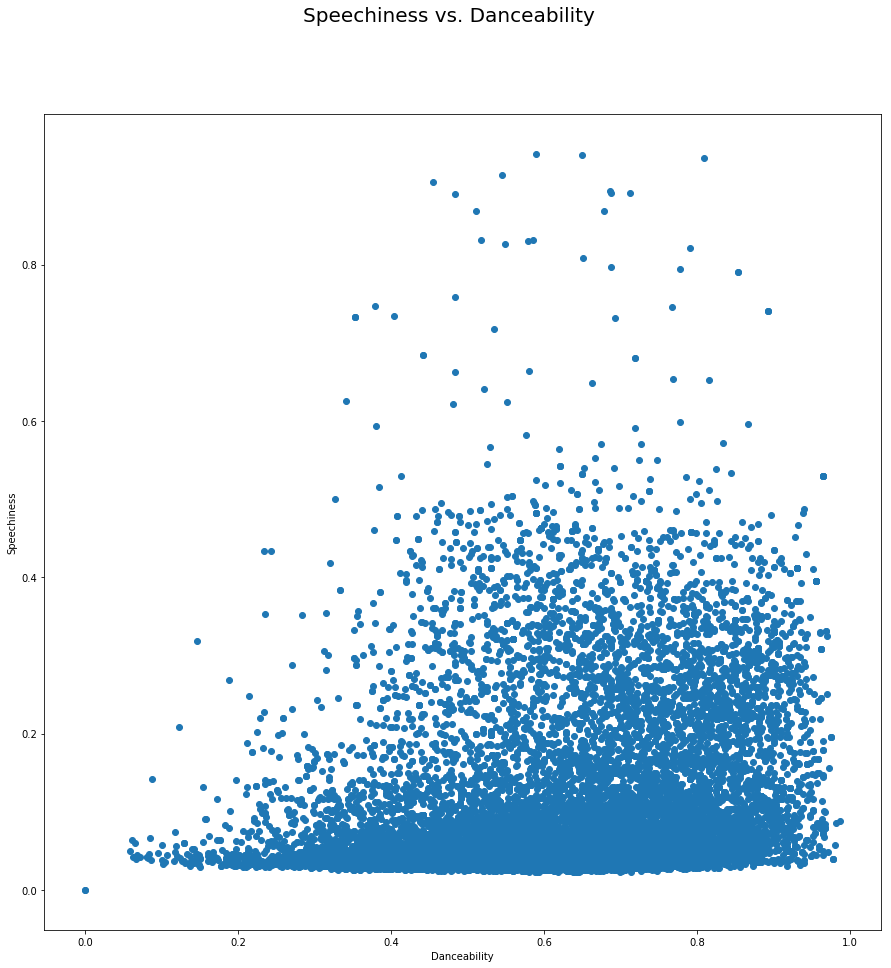

In [9]:
fig, ax = plt.subplots(figsize = (15,15))
plt.scatter(song_data_df['danceability'], song_data_df['speechiness'])
plt.suptitle('Speechiness vs. Danceability', fontsize = 20)
plt.xlabel('Danceability')
plt.ylabel('Speechiness')
plt.show()

**Speechiness** is defined as the presence of spoken words in music, and typically genres such as rap are considered to be within the ranges of 0.33 and 0.66 for speechiness. As we can see in this scatter plot of **speechiness** versus **danceability**, most songs typically lie beneath the speechiness range that is considered for rap. In terms of the relationship that danceability has with speechiness, we can see that the plot becomes more dense past 0.5 danceability and below 0.3 speechiness.

**Scatter Plot - Energy vs. Speechiness**

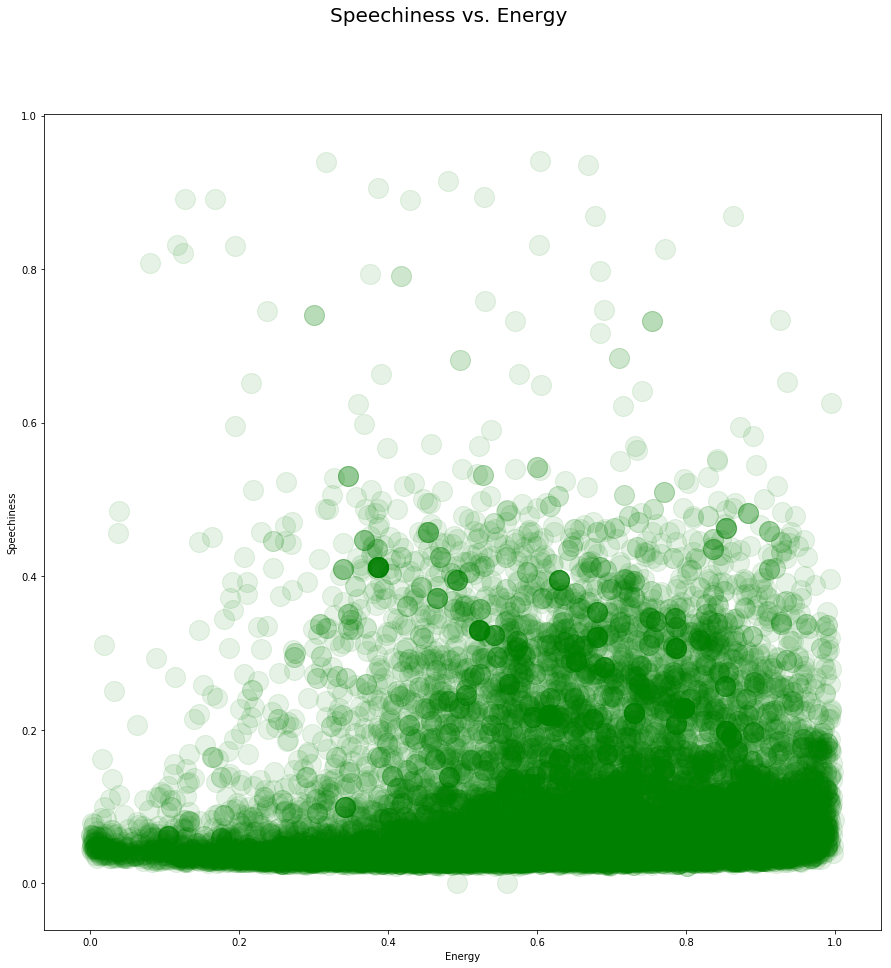

In [10]:
fig, ax = plt.subplots(figsize = (15,15))
plt.scatter(song_data_df['energy'], song_data_df['speechiness'], color='g', alpha=0.1, s=400)
plt.suptitle('Speechiness vs. Energy', fontsize = 20)
plt.xlabel('Energy')
plt.ylabel('Speechiness')
plt.show()

When we create a scatter plot that plots **energy** and **speechiness**, we can use rap as an example again. If rap songs are typically within the range of 0.33 to 0.66, then it's clear that the majority of rap songs are not typically of high energy. We can consider that songs with the speechiness range of 0.0 to 0.1 and high energy betwen 0.6 to 1.0 could be from genres that are purely instrumental, such as jazz, or other genres, such as metal, bachata, etc. 

**Pie Chart - Audio Valence**

Min Audio Valence 0.0
Max Audio Valence 0.984
Mean Audio Valence 0.527966875497741
90-100: 1388
80-90: 1768
70-80: 2131
60-70: 2314
50-60: 2516
40-50: 2392
30-40: 2386
20-30: 1968
10-20: 1389
0-10 : 583


(-1.2639101100465204,
 1.1078052433355485,
 -1.2185151029778534,
 1.2177548957143762)

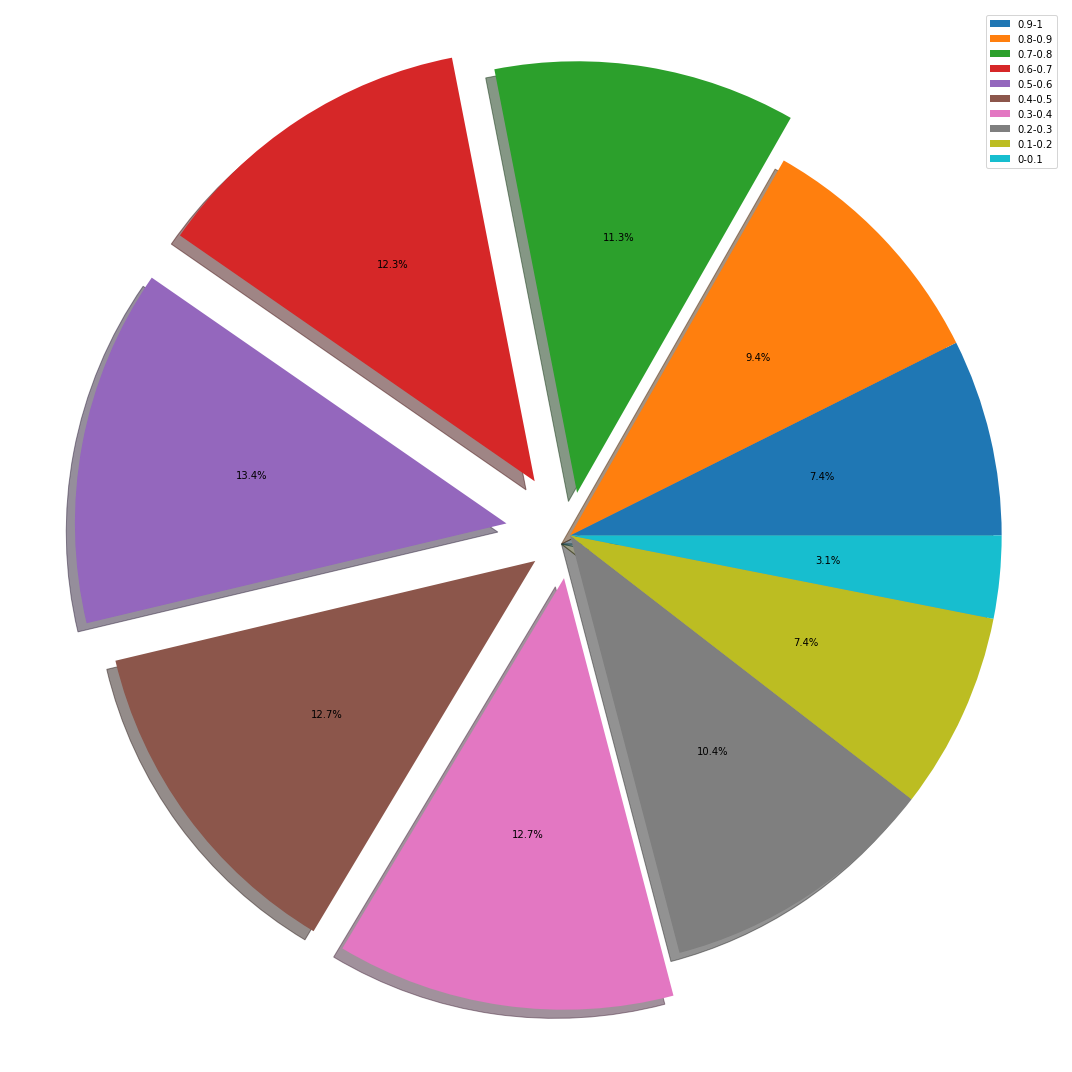

In [38]:
fig, ax = plt.subplots(figsize = (15,15))
min_valence = min(song_data_df['audio_valence']);
max_valence = max(song_data_df['audio_valence']);
mean_valence = song_data_df['audio_valence'].mean();

p90_100 = len(song_data_df[(song_data_df['audio_valence'] >= 0.9)])
p80_90 = len(song_data_df[(song_data_df['audio_valence'] >= 0.8) & (song_data_df['audio_valence'] < 0.9)])
p70_80 = len(song_data_df[(song_data_df['audio_valence'] >= 0.7) & (song_data_df['audio_valence'] < 0.8)])
p60_70 = len(song_data_df[(song_data_df['audio_valence'] >= 0.6) & (song_data_df['audio_valence'] < 0.7)])
p50_60 = len(song_data_df[(song_data_df['audio_valence'] >= 0.5) & (song_data_df['audio_valence'] < 0.6)])
p40_50 = len(song_data_df[(song_data_df['audio_valence'] >= 0.4) & (song_data_df['audio_valence'] < 0.5)])
p30_40 = len(song_data_df[(song_data_df['audio_valence'] >= 0.3) & (song_data_df['audio_valence'] < 0.4)])
p20_30 = len(song_data_df[(song_data_df['audio_valence'] >= 0.2) & (song_data_df['audio_valence'] < 0.3)])
p10_20 = len(song_data_df[(song_data_df['audio_valence'] >= 0.1) & (song_data_df['audio_valence'] < 0.2)])
p00_10 = len(song_data_df[(song_data_df['audio_valence'] >= 0) & (song_data_df['audio_valence'] < 0.1)])


print("Min Audio Valence", min_valence)
print("Max Audio Valence", max_valence)
print("Mean Audio Valence", mean_valence)
print("90-100:", p90_100)
print("80-90:", p80_90)
print("70-80:", p70_80)
print("60-70:", p60_70)
print("50-60:", p50_60)
print("40-50:", p40_50)
print("30-40:", p30_40)
print("20-30:", p20_30)
print("10-20:", p10_20)
print("0-10 :", p00_10)

sizes = [p90_100, p80_90, p70_80, p60_70, p50_60, p40_50, p30_40, p20_30, p10_20, p00_10]
labels = '0.9-1', '0.8-0.9', '0.7-0.8', '0.6-0.7', '0.5-0.6', '0.4-0.5', '0.3-0.4', '0.2-0.3', '0.1-0.2', '0-0.1'
explode = (0, 0, 0.1, 0.15, 0.15, 0.1, 0.1, 0, 0, 0)

patches, texts, _ = plt.pie(sizes, explode = explode, autopct='%1.1f%%', shadow=True)
plt.legend(patches, labels, loc="best")
plt.axis('equal')

This pie chart illustrates the various ranges of **audio valence**, and the percentages of songs from our data collection within these ranges. As we can see, each range is almost evenly distrubted throughout our data, except for the highest and lowest ranges of audio valence. If we wanted an example of some more positive songs we could do so as below:

In [26]:
happy_songs = song_info_df[song_data_df.audio_valence > 0.9]
happy_songs.head(20)

,artist_name,album_names,playlist
song_name,,,
The Middle,Jimmy Eat World,Bleed American (Deluxe Edition),00s Rock Anthems
Down With the Sickness,Disturbed,The Sickness,00s Rock Anthems
Lento,Rudy Mancuso,Lento,100% LatinX
No Gratis,Messiah,No Gratis,100% LatinX
Finesse (Remix) [feat. Cardi B],Bruno Mars,Finesse (Remix) [feat. Cardi B],100% LatinX
Toxic,Britney Spears,Greatest Hits: My Prerogative,2000s Smash Hits
Pumped Up Kicks,Foster The People,Torches,2000s Smash Hits
Hey Ya! - Radio Mix / Club Mix,OutKast,Speakerboxxx/The Love Below,2000s Smash Hits
SexyBack,Justin Timberlake,FutureSex/LoveSounds,2000s Smash Hits


Alternatively, we can also print out the songs with lowest audio valence:

In [25]:
sad_songs = song_info_df[song_data_df.audio_valence < 0.1]
sad_songs.head(20)

,artist_name,album_names,playlist
song_name,,,
It's Been Awhile,Staind,Break The Cycle,00s Rock Anthems
Beautiful,Christina Aguilera,Stripped,2000s Smash Hits
The End - Remastered,The Doors,The Doors (50th Anniversary Deluxe Edition),60s Rock Anthems
You Are So Beautiful,Joe Cocker,I Can Stand A Little Rain,70s & 80s Acoustic
"Another Brick in the Wall, Pt. 1",Pink Floyd,The Wall,70s Rock Anthems
Hallelujah,Jeff Buckley,Grace,90s Acoustic
Zombie - Acoustic Version,The Cranberries,Something Else,90s Acoustic
Glycerine,Bush,Sixteen Stone (Remastered),90s Pop Rock Essentials
Hallelujah,Jeff Buckley,Grace (Legacy Edition),90s Rock Anthems


**Histogram - Tempo**

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   2.,
          1.,   8.,  10.,  28.,  21.,  54.,  77.,  75., 199., 273., 288.,
        472., 282., 300., 324., 644., 544., 644., 623., 715., 596., 527.,
        408., 446., 413., 533., 414., 853., 587., 820., 868., 677., 404.,
        356., 415., 629., 258., 407., 293., 479., 177., 231., 167., 173.,
        288., 129., 179., 130., 243., 235., 186., 121., 153.,  83.,  54.,
         40.,  42.,  56.,  24.,  20.,  35.,  25.,  37.,  21.,   6.,   5.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.     ,   2.42318,   4.84636,   7.26954,   9.69272,  12.1159 ,
         14.53908,  16.96226,  19.38544,  21.80862,  24.2318 ,  26.65498,
         29.07816,  31.50134,  33.92452,  36.3477 ,  38.77088,  41.19406,
         43.61724,  46.04042,  48.4636 ,  50.88678,  53.30996,  55.73314,
         58.15632,  60

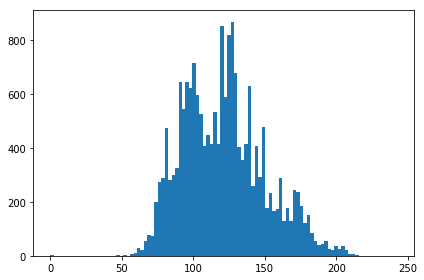

In [39]:
plt.hist(song_data_df['tempo'], bins=100)

As we can see the majority of songs tend to be around 120 BPM, which is not surprising as 120 BPM is considered the most widely used and standard BPM typically used in music. Below is a list of the top 20 songs with BPM above 200:

In [27]:
high_tempo = song_info_df[song_data_df.tempo > 200]
high_tempo.head(20)

,artist_name,album_names,playlist
song_name,,,
Wild Thing,The Troggs,Hit Single Anthology,60s Rock Anthems
Waiting For A Girl Like You,Foreigner,4 [Expanded],80s Love Songs
Around The Way Girl,LL Cool J,Mama Said Knock You Out (Deluxe Edition),90's Hip-Hop Don't Stop
It's The End Of The World As We Know It (And I Feel Fine),R.E.M.,Document (R.E.M. No. 5),90s Pop Rock Essentials
Moves (feat. Snoop Dogg),Olly Murs,Moves (feat. Snoop Dogg),A Perfect Day
FourFiveSeconds,Rihanna,FourFiveSeconds,Acoustic Hits
FourFiveSeconds,Rihanna,FourFiveSeconds,Acoustic Hits_ Oldies but Goodies
Hurtin' Me - The Remix,Stefflon Don,SECURE,Afropop.csv
Maga 2 Mugu,DaVido,Son of Mercy - EP,Afropop.csv


Alternatively, here's a list of the top 20 songs with a BPM below 60: 

In [28]:
slow_tempo = song_info_df[song_data_df.tempo < 60]
slow_tempo.head(20)

,artist_name,album_names,playlist
song_name,,,
Smoke Gets In Your Eyes - Single Version,The Platters,Rock N' Roll Legends,All Out 50s
Losing,H.E.R.,H.E.R. Volume 1,All The Feels
CHANGE,Kwame,Endless Conversations.,Beats n' Bars
Give It to Me,HOMESHAKE,Midnight Snack,Bedroom Pop
Strange Fruit,Billie Holiday,The Complete Commodore/Decca Masters,Black History Salute
Enter,Milo Heart,Enter,Cool Down
Portugal (A Lift),Sea Oleena,S&S Presents: Dreams,Dreamy Vibes
Gina Rodriguez - Latinos Trending Intro,Various Artists,Gina Rodriguez - Latinos Trending Intro,For Puerto Rico Por Puerto Rico
Aura,JFilt,Knodville,Lush Lofi


<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 4:</b> Clustering</blockquote> 

Select a number of numerical columns to be used for your clustering algorithms. Explain the business logic of your clustering. Select expected number of clustering to explore.

<b><font color="blue" size = 4>a)</font>  Cluster Analysis</b>: Explain the business reason for your selection of the number of clusters.

<span style="background-color: #FFFF00">Your answer here</span>

We have decided to utilize three features in our kMeans and kNN clustering, primarily because we wanted to include 3D plots for comparisons to visualize how these algorthims cluster the same songs differently. Thus we decided to take a random sample of 30 songs from our list of approximately 19,000 songs. The features that we decided to use for kMeans and kNN include **danceability**, **speechiness**, and **audio valence**. However, in our hierarchial clustering, we decided to utlizie all 16 features. We decided to use 5 in each clustering method because we felt that it provided a separation of generalized genres that we could deduce, as opposed to trying to analyze several sub-genres. 

<b><font color="blue" size = 4>b)</font> k-Means</b>: Cluster your data using k-means. Explain your results. Try two different schemas of clusters.

<b><font color="red" size = 4>Schema 1: Average</font>

**Dendrogram of 30 random songs: Categorized based on Danceability, Speechiness, and Audio Valence**

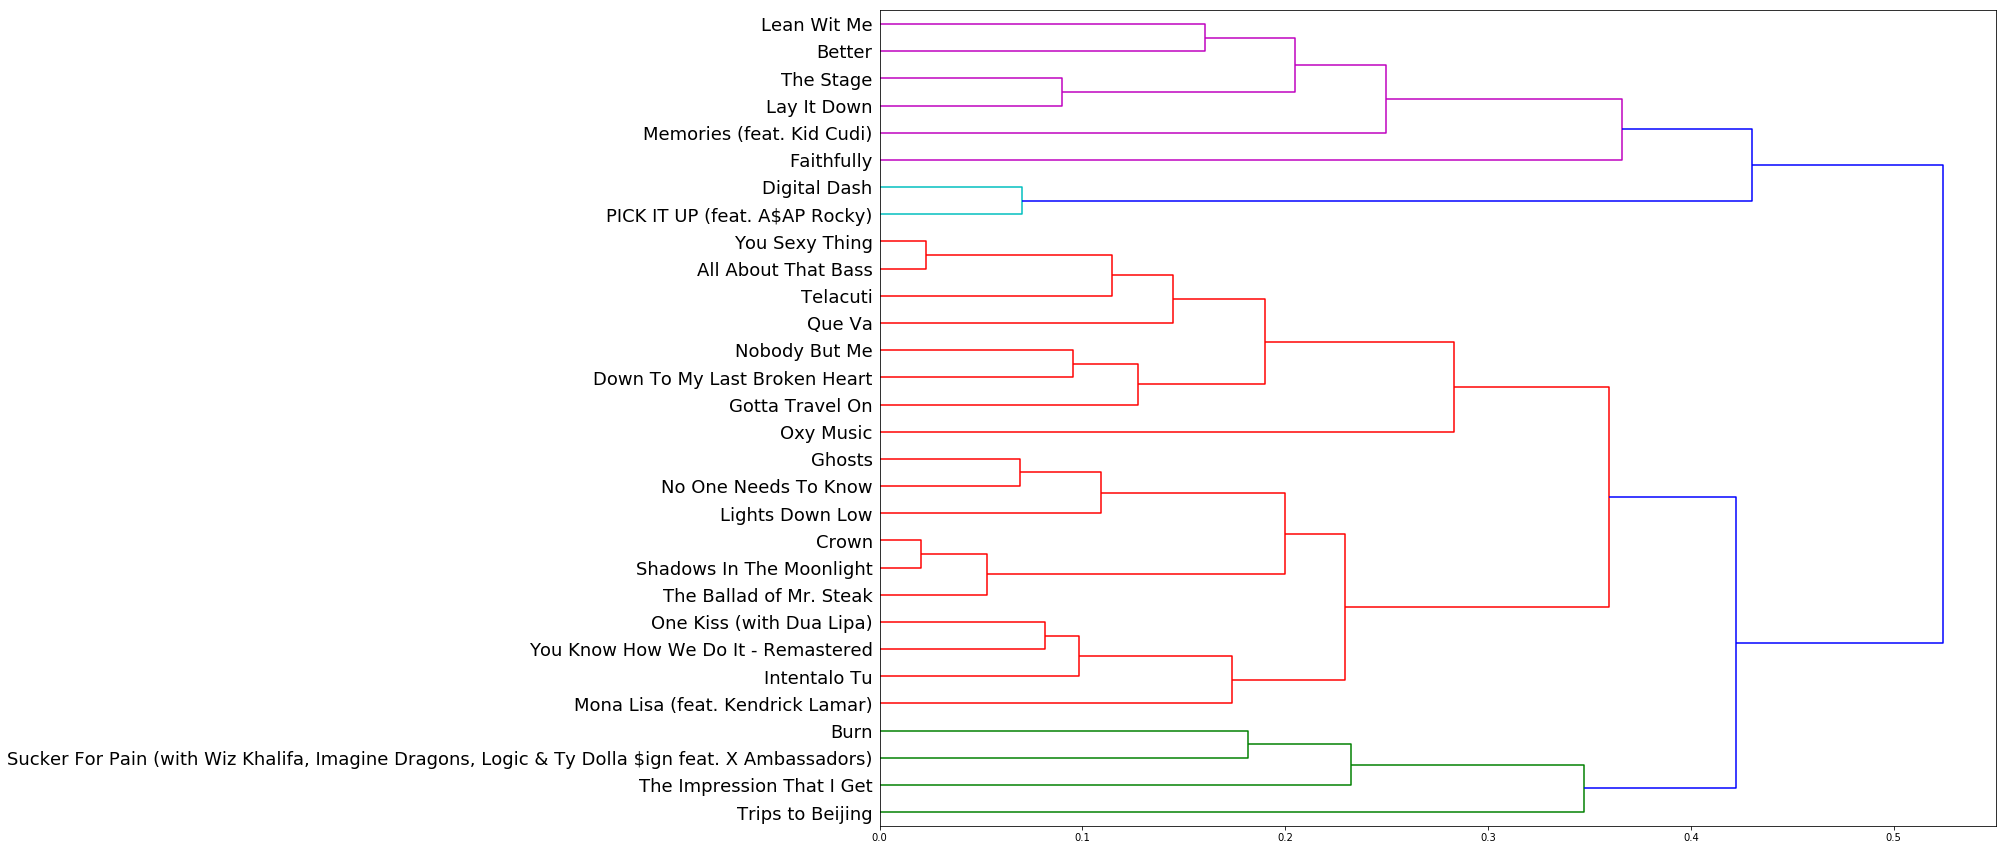

In [9]:
#Sample 30 random songs
sample_df = song_data_df.sample(n = 30, random_state = 3)
sample_df = sample_df[["danceability", "speechiness", "audio_valence"]]
Z = linkage(sample_df, 'average')
plt.figure(figsize = (20,15))
D = dendrogram(Z=Z, orientation = "right", leaf_font_size = 18, labels = sample_df.index)

<b><font color="red" size = 4>Schema 2: Median</font>

**Dendrogram of 30 random songs: Categorized based on Danceability, Speechiness, and Audio Valence**

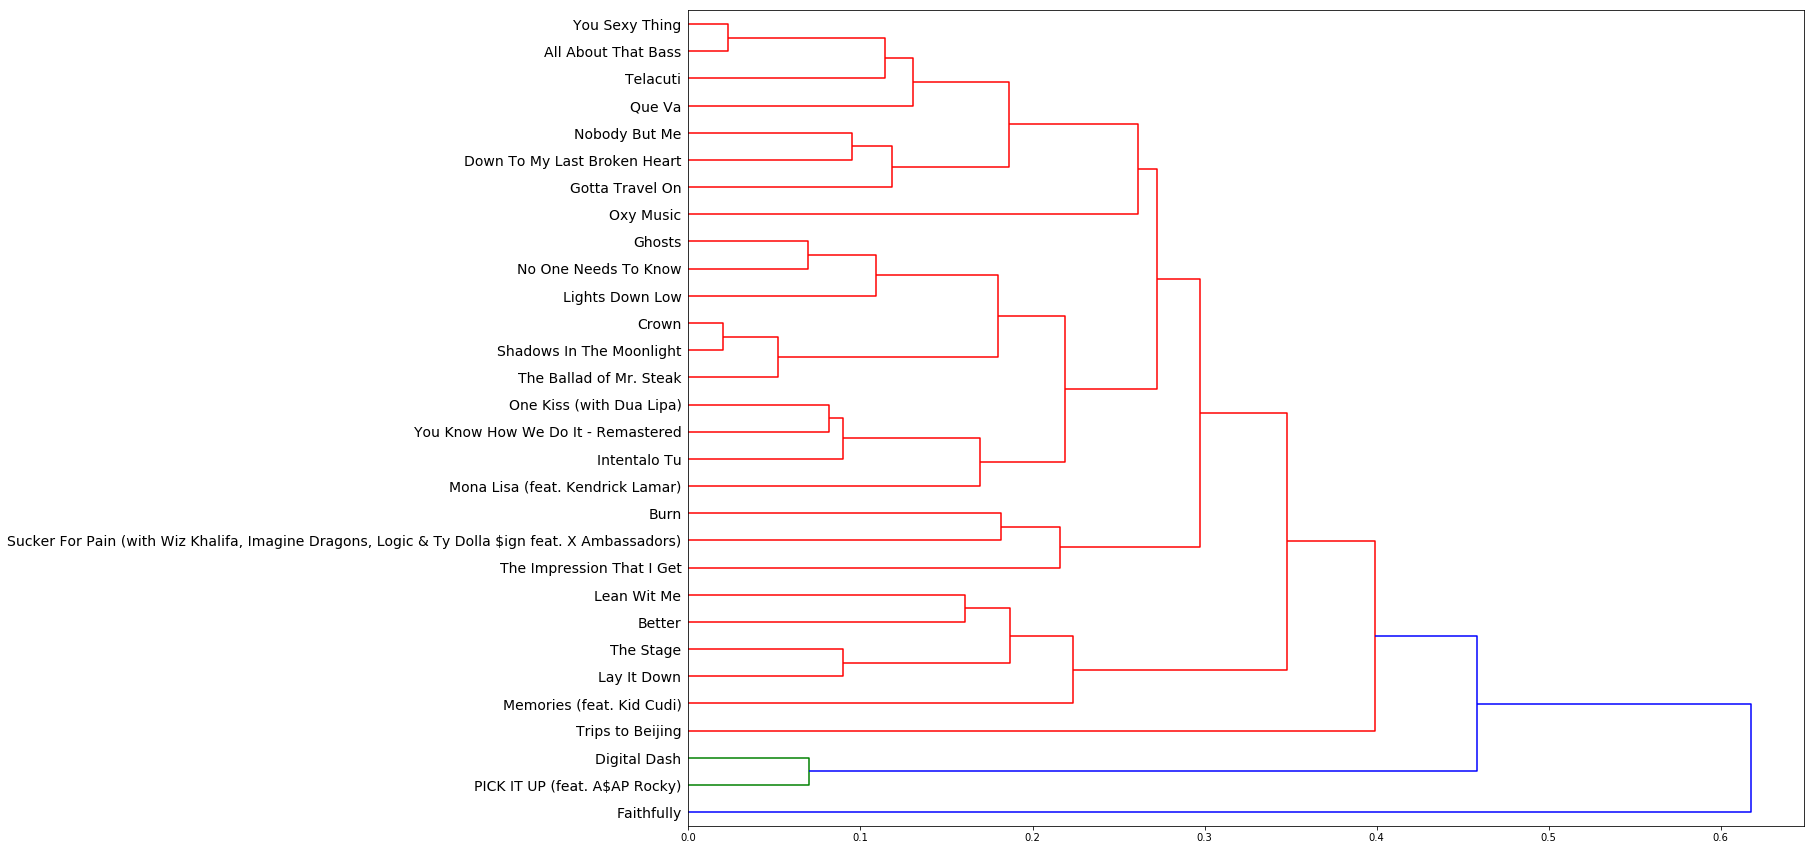

In [10]:
#Median schema
Z = linkage(sample_df, 'median')
plt.figure(figsize = (20,15))
D = dendrogram(Z=Z, orientation = "right", leaf_font_size = 14, labels = sample_df.index)

**3D Plot: Danceability vs. Speechiness vs. Audio Valence**

In [11]:
model = KMeans(n_clusters = 5)
model.fit(sample_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'Audio Valence')

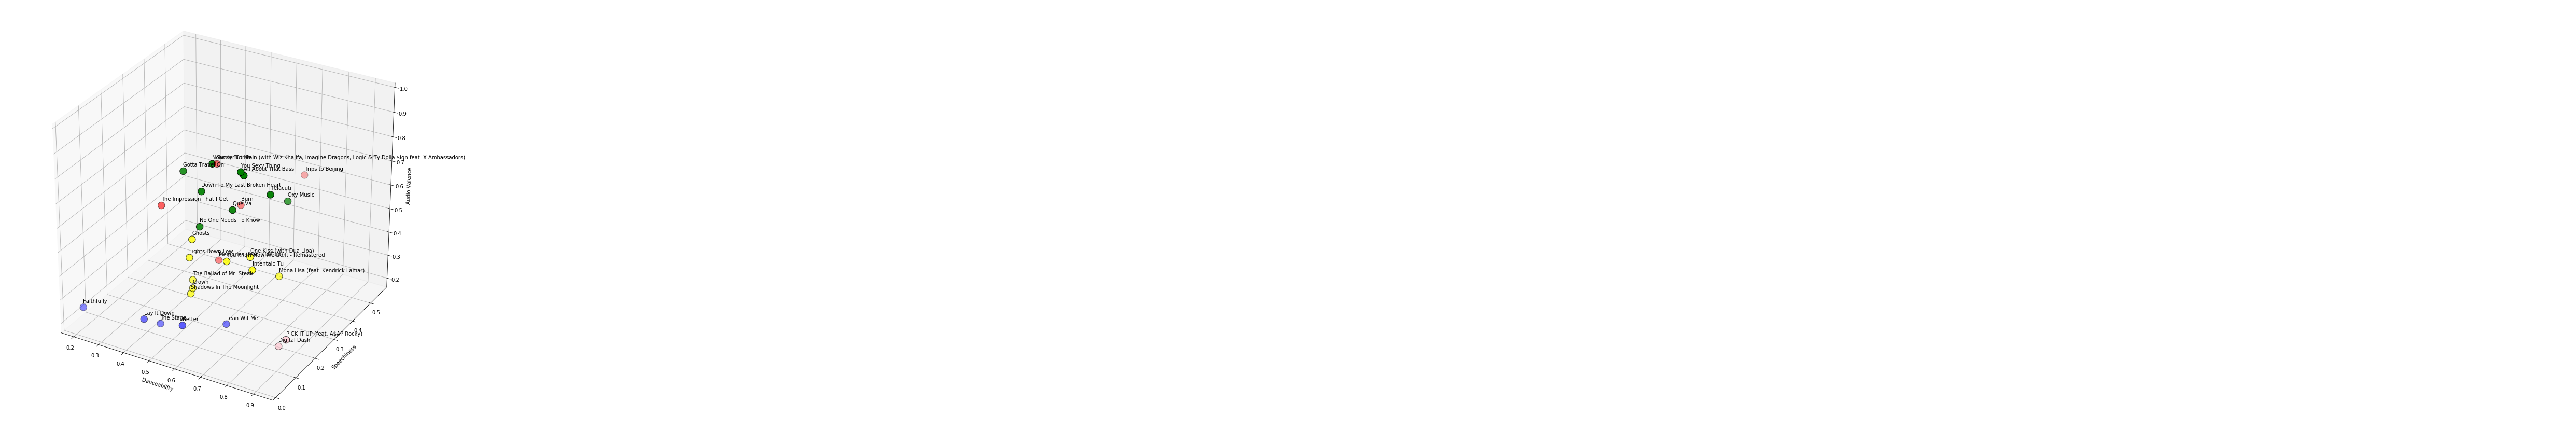

In [12]:
colormap = np.array(['red', 'green', 'blue', "yellow", "pink"])

#size of plot
fig1 = plt.figure(figsize = (15,15))
ax = fig1.add_subplot(111, projection = '3d')

ax.scatter(xs = sample_df.danceability, ys = sample_df.speechiness, zs = sample_df.audio_valence, c = colormap[model.labels_] , cmap = 'viridis', s = 180, edgecolor = 'black', depthshade = True)

for value, dance, speech, valence in sample_df[['danceability', 'speechiness', 'audio_valence']].itertuples(index = True, name = None):
    ax.text(dance, speech, valence + 0.02, value)
    
ax.set_xlabel("Danceability")
ax.set_ylabel("Speechiness")
ax.set_zlabel("Audio Valence")


<b><font color="blue" size = 4>c)</font> Hierarchical Clustering</b>: Cluster your data using hierarchical clustering. Explain your results. Try two different schemas of clusters.

<b><font color="red" size = 4>Schema 1: Average</font>

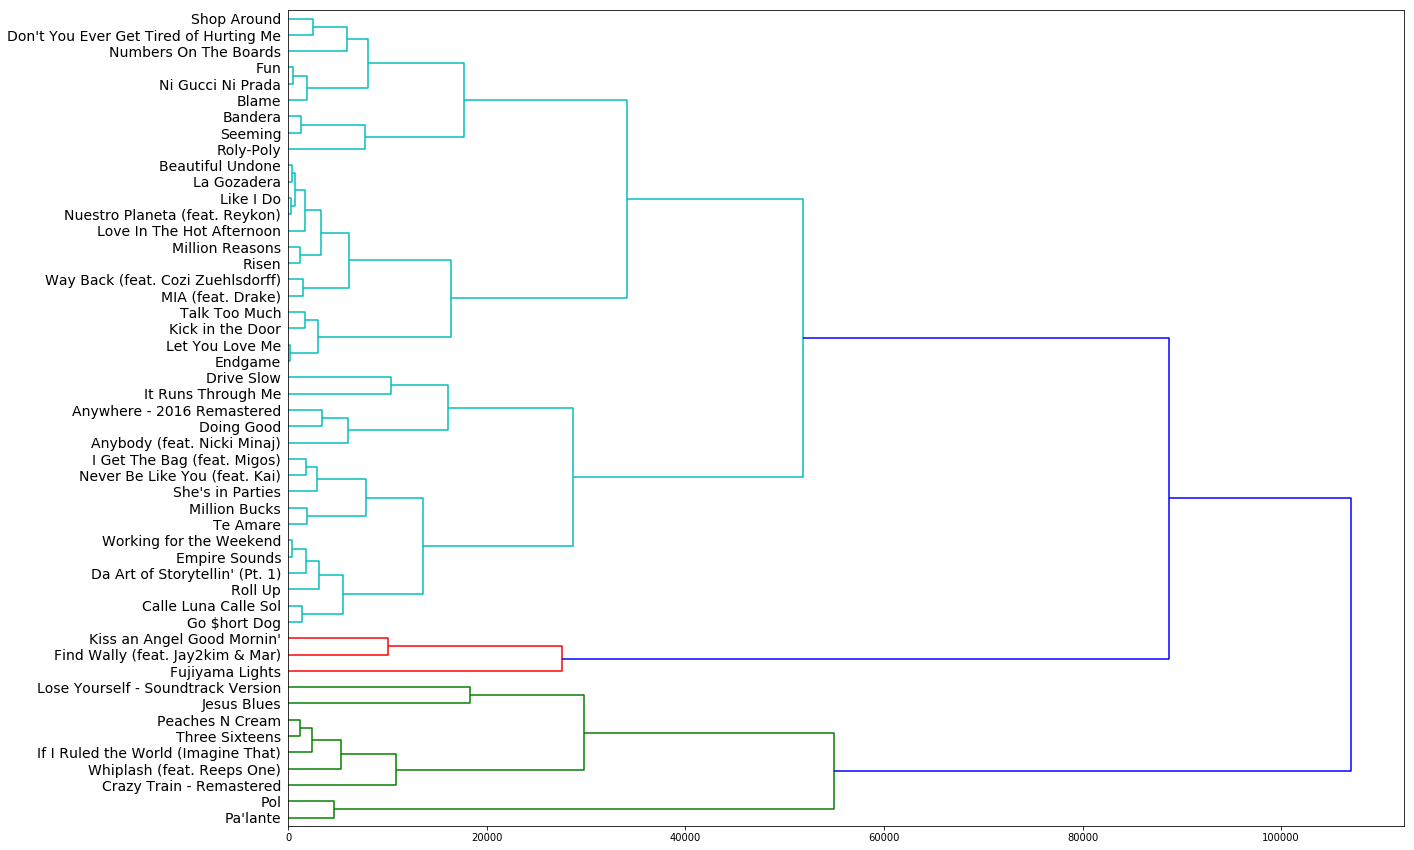

In [13]:
sample_df2 = song_data_df.sample(n = 50, random_state = 9)
Z = linkage(sample_df2, 'average')
plt.figure(figsize = (20,15))
D = dendrogram(Z=Z, orientation = "right", leaf_font_size = 14, labels = sample_df2.index)

In [14]:
five_categories = fcluster(Z, 5, criterion = 'maxclust')
sample_df2["five_clust"] = five_categories

cat1 = sample_df2.loc[(sample_df2["five_clust"] == 1)].index
cat2 = sample_df2.loc[(sample_df2["five_clust"] == 2)].index
cat3 = sample_df2.loc[(sample_df2["five_clust"] == 3)].index
cat4 = sample_df2.loc[(sample_df2["five_clust"] == 4)].index
cat5 = sample_df2.loc[(sample_df2["five_clust"] == 5)].index

print("If we categorize the songs into 5 clusters, they would be grouped as follows: ")

print("\nCluster 1: ")
for elem in cat1:
    print(elem)
    
print("\nCluster 2: ")
for elem in cat2:
    print(elem)
    
print("\nCluster 3: ")
for elem in cat3:
    print(elem)

print("\nCluster 4: ")
for elem in cat4:
    print(elem)
    
print("\nCluster 5: ")
for elem in cat5:
    print(elem)

If we categorize the songs into 5 clusters, they would be grouped as follows: 

Cluster 1: 
Pa'lante
Pol

Cluster 2: 
Three Sixteens
Crazy Train - Remastered
Whiplash (feat. Reeps One)
Jesus Blues
Peaches N Cream
Lose Yourself - Soundtrack Version
If I Ruled the World (Imagine That)

Cluster 3: 
Find Wally (feat. Jay2kim & Mar)
Fujiyama Lights
Kiss an Angel Good Mornin'

Cluster 4: 
It Runs Through Me
Anybody (feat. Nicki Minaj)
Roll Up
Go $hort Dog
Never Be Like You (feat. Kai)
Doing Good
Drive Slow
Empire Sounds
Te Amare
Million Bucks
I Get The Bag (feat. Migos)
Calle Luna Calle Sol
Anywhere - 2016 Remastered
Da Art of Storytellin' (Pt. 1)
She's in Parties
Working for the Weekend

Cluster 5: 
La Gozadera
Kick in the Door
Ni Gucci Ni Prada
MIA (feat. Drake)
Endgame
Talk Too Much
Risen
Let You Love Me
Million Reasons
Love In The Hot Afternoon
Seeming
Bandera
Don't You Ever Get Tired of Hurting Me
Way Back (feat. Cozi Zuehlsdorff)
Roly-Poly
Blame
Numbers On The Boards
Beautiful Undone
F

<b><font color="red" size = 4>Schema 2: Median</font>

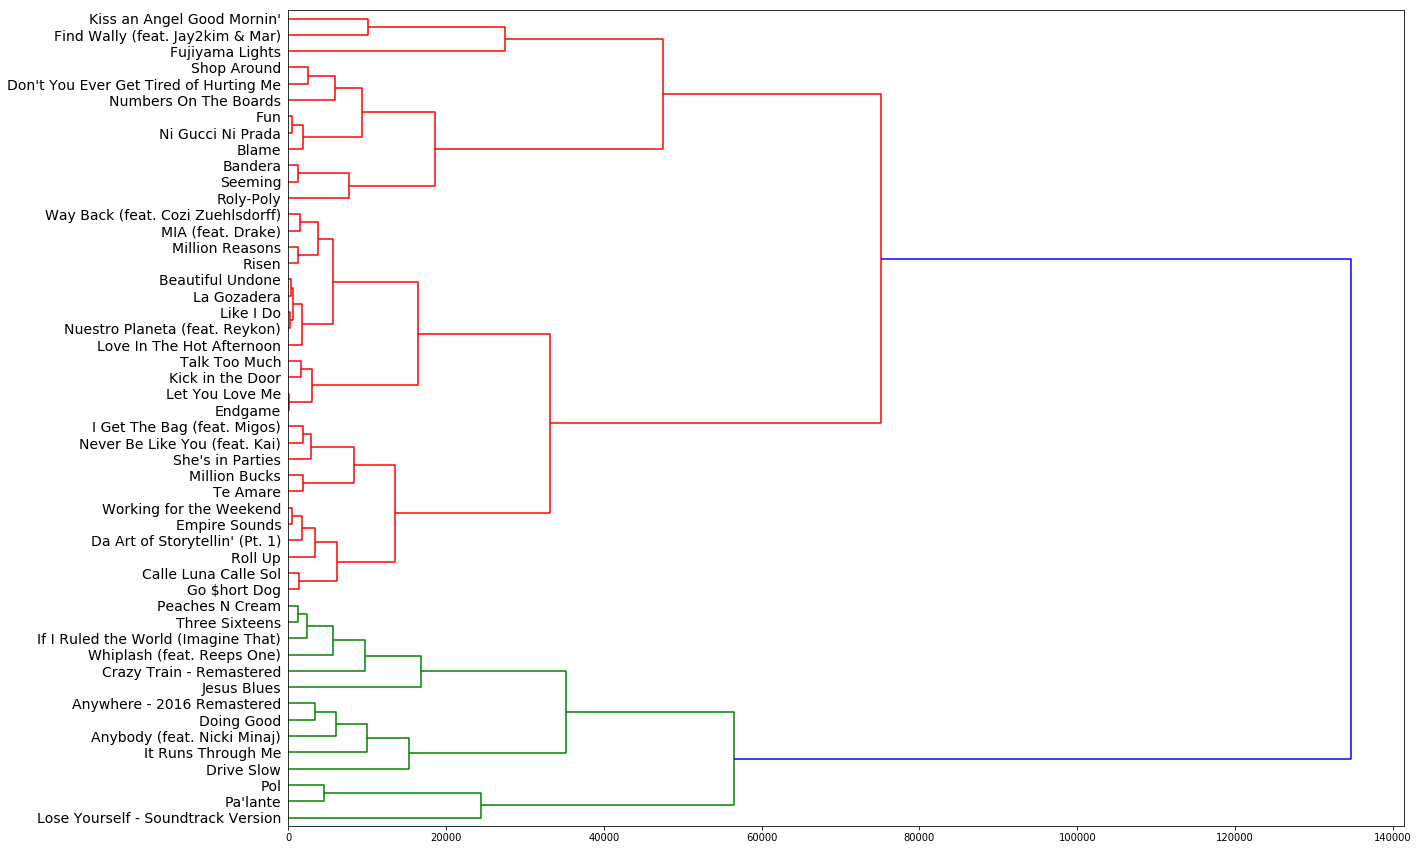

In [15]:
Z = linkage(sample_df2, 'median')
plt.figure(figsize = (20,15))
D = dendrogram(Z=Z, orientation = "right", leaf_font_size = 14, labels = sample_df2.index)

In [16]:
five_categories = fcluster(Z, 5, criterion = 'maxclust')
sample_df2["five_clust"] = five_categories

cat1 = sample_df2.loc[(sample_df2["five_clust"] == 1)].index
cat2 = sample_df2.loc[(sample_df2["five_clust"] == 2)].index
cat3 = sample_df2.loc[(sample_df2["five_clust"] == 3)].index
cat4 = sample_df2.loc[(sample_df2["five_clust"] == 4)].index
cat5 = sample_df2.loc[(sample_df2["five_clust"] == 5)].index

print("If we categorize the songs into 5 clusters, they would be grouped as follows: ")

print("\nCluster 1: ")
for elem in cat1:
    print(elem)
    
print("\nCluster 2: ")
for elem in cat2:
    print(elem)
    
print("\nCluster 3: ")
for elem in cat3:
    print(elem)

print("\nCluster 4: ")
for elem in cat4:
    print(elem)
    
print("\nCluster 5: ")
for elem in cat5:
    print(elem)

If we categorize the songs into 5 clusters, they would be grouped as follows: 

Cluster 1: 
Pa'lante
Lose Yourself - Soundtrack Version
Pol

Cluster 2: 
It Runs Through Me
Three Sixteens
Crazy Train - Remastered
Anybody (feat. Nicki Minaj)
Whiplash (feat. Reeps One)
Jesus Blues
Peaches N Cream
Doing Good
If I Ruled the World (Imagine That)
Drive Slow
Anywhere - 2016 Remastered

Cluster 3: 
La Gozadera
Kick in the Door
Roll Up
MIA (feat. Drake)
Endgame
Talk Too Much
Risen
Let You Love Me
Million Reasons
Love In The Hot Afternoon
Go $hort Dog
Never Be Like You (feat. Kai)
Way Back (feat. Cozi Zuehlsdorff)
Empire Sounds
Te Amare
Million Bucks
I Get The Bag (feat. Migos)
Calle Luna Calle Sol
Da Art of Storytellin' (Pt. 1)
She's in Parties
Working for the Weekend
Beautiful Undone
Nuestro Planeta (feat. Reykon)
Like I Do

Cluster 4: 
Ni Gucci Ni Prada
Seeming
Bandera
Don't You Ever Get Tired of Hurting Me
Roly-Poly
Blame
Numbers On The Boards
Fun
Shop Around

Cluster 5: 
Find Wally (feat. Ja

<b><font color="blue" size = 4>d)</font> kNN Clustering</b>: Use your results from the cluster analysis performed in a) or b) and create a short training set. Cluster your data using your training set on kNN. Explain your results.

In [17]:
Z = linkage(sample_df, 'average')
k = 5
dend_clusters = fcluster(Z, k, criterion = 'maxclust')

In [18]:
dend_clusters

array([4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 1, 2, 3, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 4, 4, 1], dtype=int32)

In [19]:
knn = KNeighborsClassifier(n_neighbors = k, 
                           p = 2)# p=2 for euclidean distance
col_names = sample_df.columns.values
model = knn.fit(sample_df[col_names], dend_clusters)

Text(0.5, 0, 'Audio Valence')

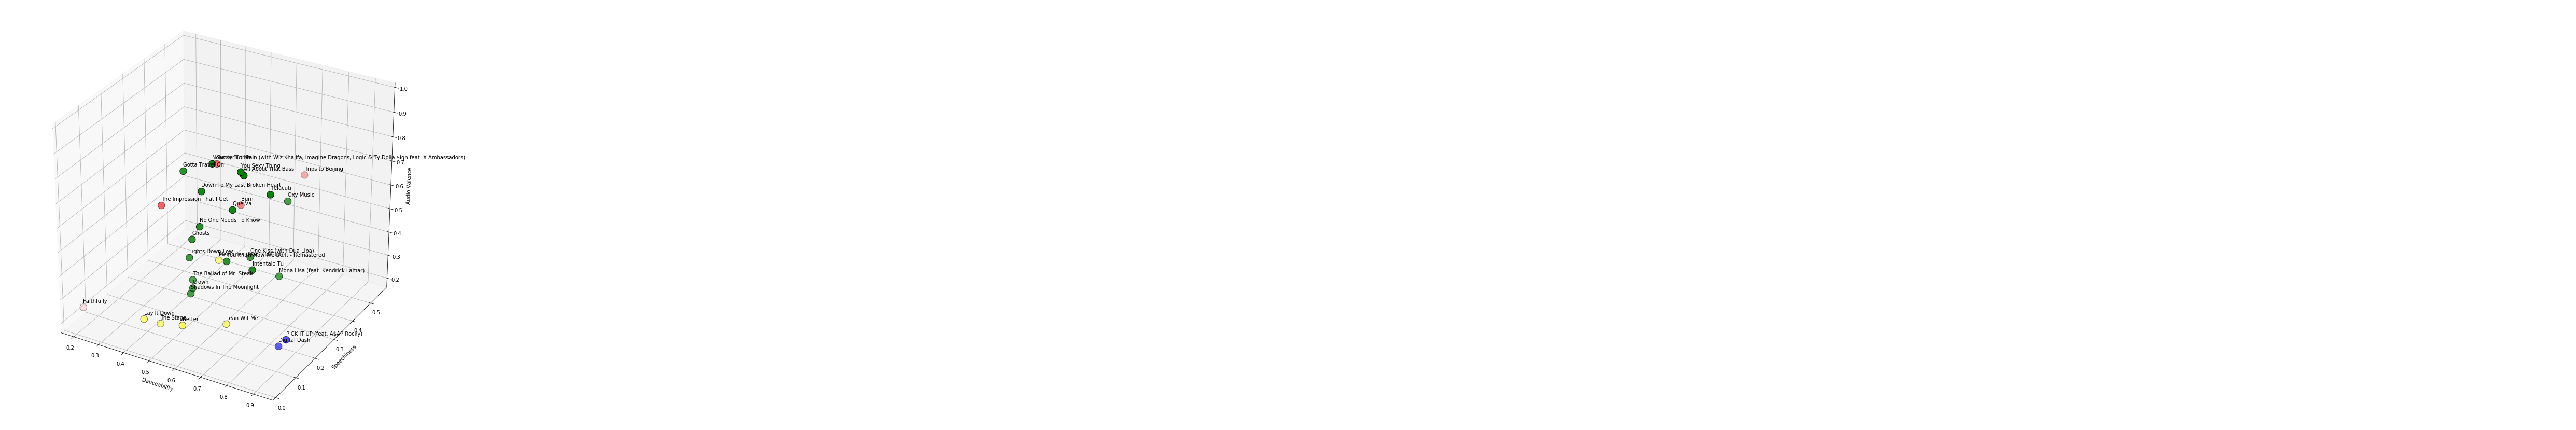

In [70]:
colormap = np.array(["", 'red', 'green', 'blue', "yellow", "pink"])

#size of plot
fig1 = plt.figure(figsize = (15,15))
ax = fig1.add_subplot(111, projection = '3d')

ax.scatter(xs = sample_df.danceability, ys = sample_df.speechiness, zs = sample_df.audio_valence, c = colormap[dend_clusters] , cmap = 'viridis', s = 180, edgecolor = 'black', depthshade = True)

for value, dance, speech, valence in sample_df[['danceability', 'speechiness', 'audio_valence']].itertuples(index = True, name = None):
    ax.text(dance, speech, valence + 0.02, value)
    
ax.set_xlabel("Danceability")
ax.set_ylabel("Speechiness")
ax.set_zlabel("Audio Valence")


<span style="background-color: #FFFF00">Your answer here</span>

**Predictions - Danceability, Speechiness, and Audio Valence**

In [74]:
song1 = song_data_df.loc["Dark Necessities"]
song2 = song_data_df.loc["Love Never Felt so Good"]
song3 = song_data_df.loc["The Ringer"]
song4 = song_data_df.loc["Fly Me To The Moon - Remastered"]
song5 = song_data_df.loc["Spit Out the Bone"]
song6 = song_data_df.loc["I Walk the Line"]
song7 = song_data_df.loc["Mariposa Traicionera"]
song8 = song_data_df.loc["Unsteady"]


song1 = np.array(song1[["danceability", "speechiness", "audio_valence"]]).reshape(1,-1)
song2 = np.array(song2[["danceability", "speechiness", "audio_valence"]]).reshape(1,-1)
song3 = np.array(song3[["danceability", "speechiness", "audio_valence"]]).reshape(1,-1)
song4 = np.array(song4[["danceability", "speechiness", "audio_valence"]]).reshape(1,-1)
song5 = np.array(song5[["danceability", "speechiness", "audio_valence"]]).reshape(1,-1)
song6 = np.array(song6[["danceability", "speechiness", "audio_valence"]]).reshape(1,-1)
song7 = np.array(song7[["danceability", "speechiness", "audio_valence"]]).reshape(1,-1)
song8 = np.array(song8[["danceability", "speechiness", "audio_valence"]]).reshape(1,-1)

print(song1)
print(song2)
print(song3)
print(song4)
print(song5)
print(song6)
print(song7)
print(song8)


prediction1 = knn.predict(song1)[0]
prediction2 = knn.predict(song2)[0]
prediction3 = knn.predict(song3)[0]
prediction4 = knn.predict(song4)[0]
prediction5 = knn.predict(song5)[0]
prediction6 = knn.predict(song6)[0]
prediction7 = knn.predict(song7)[0]
prediction8 = knn.predict(song8)[0]
#prediction2 = knn.predict(animal2)[0]
#prediction3 = knn.predict(animal3)[0]
#prediction4 = knn.predict(animal4)[0]

print("Prediction:Song #: ", prediction1, ", classification: ", colormap[prediction1])
print("Prediction:Song #: ", prediction2, ", classification: ", colormap[prediction2])
print("Prediction:Song #: ", prediction3, ", classification: ", colormap[prediction3])
print("Prediction:Song #: ", prediction4, ", classification: ", colormap[prediction4])
print("Prediction:Song #: ", prediction5, ", classification: ", colormap[prediction5])
print("Prediction:Song #: ", prediction6, ", classification: ", colormap[prediction6])
print("Prediction:Song #: ", prediction7, ", classification: ", colormap[prediction7])
print("Prediction:Song #: ", prediction8, ", classification: ", colormap[prediction8])
#print("Prediction: Animal Type #: ", prediction2, ", classification: ", classification[prediction2])
#print("Prediction: Animal Type #: ", prediction3, ", classification: ", classification[prediction3])
#print("Prediction: Animal Type #: ", prediction4, ", classification: ", classification[prediction4])

[[0.7    0.0716 0.197 ]]
[[0.775  0.0435 0.712 ]]
[[0.939 0.291 0.42 ]]
[[0.67   0.0564 0.45  ]]
[[0.157 0.091 0.462]]
[[0.713  0.0384 0.56  ]]
[[0.773  0.0326 0.907 ]]
[[0.389  0.0644 0.199 ]]
Prediction:Song #:  4 , classification:  yellow
Prediction:Song #:  2 , classification:  green
Prediction:Song #:  2 , classification:  green
Prediction:Song #:  2 , classification:  green
Prediction:Song #:  4 , classification:  yellow
Prediction:Song #:  2 , classification:  green
Prediction:Song #:  2 , classification:  green
Prediction:Song #:  4 , classification:  yellow


In [68]:
song_info_df[song_info_df.artist_name == "Maná"]

,artist_name,album_names,playlist
song_name,,,
Oye Mi Amor,Maná,¿Dónde Jugarán Los Niños?,50 Latin Classics
Clavado En Un Bar,Maná,Sueños Líquidos,Fiesta 90era
Oye Mi Amor,Maná,¿Dónde Jugarán Los Niños?,Latin Party Anthems
En El Muelle De San Blas,Maná,Sueños Líquidos,Latin Pop Classics
Mariposa Traicionera,Maná,Six Pack: Maná - EP,Latin Pop Classics
Rayando El Sol,Maná,Falta Amor,Latin Pop Classics


<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 5:</b> Summary</blockquote> 

<b><font color="blue" size = 4>a)</font> Project Summary</b>: Write a few sentences about the result of this project. How can your stakeholder benefit from the results of your project? Which changes or adaptations can your stakehoders make now that he has your results?

<span style="background-color: #FFFF00">Your answer here</span>

The result of this project revealed a lot of interesting insight on how Spotify categorizes music based on the attributes listed in their API. It especially reveals how Spotify can use this data to recommend music to target audiences of specific genres, or even recommend music based off qualities, such as danceability. Thus based off of these attributes, Spotify can cluster music into such specific categories that if they can define a uesr's taste in music with these attributes, they can target them to continue listening to more music by automatically adding recommended songs to playlists, or by creating radio stations of similar playlists.   

<b><font color="blue" size = 4>b)</font> Project Report</b>: Write a formal report to your stakeholders with the summary of your report 

<span style="background-color: #FFFF00">Your answer here</span>